# 6.6 Lab 2: Ridge Regression and the Lasso

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from itertools import combinations

In [2]:
data = pd.read_csv(r'./data/Hitters.csv')
print(data.shape)
data.head()

(322, 21)


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
[col for col in data.columns if data[col].isnull().sum()>0]

['Salary']

In [4]:
# ONly Salarty has missing values
data.dropna(inplace = True)
# also we don;t need the name col
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [5]:
# In R, the qualitative variables are automatically converted into dummy variables, but here, we have to do it manually.
qual_vars = [col for col in data.columns if data[col].dtype == 'O']
print(qual_vars)

['League', 'Division', 'NewLeague']


In [6]:
data = pd.get_dummies(data,columns= qual_vars,drop_first=True)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


# 6.6.1 Ridge Regression

In [7]:
list_alpha = 10**np.linspace(-2,10,100)

In [8]:
# in R, by default, the predictors are standardized
X = data.drop('Salary',axis = 1)
y = data['Salary']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised

In [9]:
coeff_matrix = {}

for alpha in list_alpha:
  model = Ridge(alpha=alpha)
  model.fit(X,y)
  coeff_matrix[alpha] = list(model.coef_)

In [10]:
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1.000000e-02,-290.918728,337.229910,37.495419,-60.017790,-26.665375,134.928045,-17.051824,-388.777849,88.580588,-12.898994,477.601029,258.387712,-213.378990,78.761482,5.365672e+01,-2.219265e+01,3.125460e+01,-58.443824,-1.238497e+01
1.321941e-02,-290.862746,337.039648,37.381713,-59.842092,-26.560787,134.881689,-17.166596,-388.046721,89.164057,-12.494991,476.606154,257.661560,-213.216987,78.761568,5.363224e+01,-2.220266e+01,3.125631e+01,-58.453308,-1.239630e+01
1.747528e-02,-290.789150,336.790313,37.232619,-59.611894,-26.423634,134.820836,-17.317830,-387.078202,89.916997,-11.967363,475.303911,256.712435,-213.005133,78.761698,5.359983e+01,-2.221573e+01,3.125844e+01,-58.465774,-1.241105e+01
2.310130e-02,-290.692507,336.464367,37.037600,-59.311089,-26.244216,134.741106,-17.516885,-385.794898,90.881489,-11.280807,473.604369,255.476124,-212.728953,78.761896,5.355691e+01,-2.223273e+01,3.126106e+01,-58.482132,-1.243018e+01
3.053856e-02,-290.565733,336.039547,36.783312,-58.919331,-26.010245,134.636895,-17.778470,-384.094384,92.105310,-10.391640,471.394628,253.872789,-212.370325,78.762198,5.350006e+01,-2.225474e+01,3.126419e+01,-58.503548,-1.245482e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.274549e+09,0.000014,0.000016,0.000012,0.000015,0.000016,0.000016,0.000014,0.000019,0.000020,0.000019,0.000020,0.000021,0.000018,0.000011,9.198538e-07,-1.953073e-07,-5.164761e-07,-0.000007,-1.025022e-07
4.328761e+09,0.000011,0.000012,0.000009,0.000011,0.000012,0.000012,0.000011,0.000014,0.000015,0.000014,0.000015,0.000016,0.000013,0.000008,6.958357e-07,-1.477427e-07,-3.906955e-07,-0.000005,-7.753936e-08
5.722368e+09,0.000008,0.000009,0.000007,0.000009,0.000009,0.000009,0.000008,0.000011,0.000011,0.000011,0.000012,0.000012,0.000010,0.000006,5.263742e-07,-1.117620e-07,-2.955470e-07,-0.000004,-5.865581e-08
7.564633e+09,0.000006,0.000007,0.000005,0.000007,0.000007,0.000007,0.000006,0.000008,0.000009,0.000008,0.000009,0.000009,0.000008,0.000005,3.981828e-07,-8.454381e-08,-2.235706e-07,-0.000003,-4.437104e-08


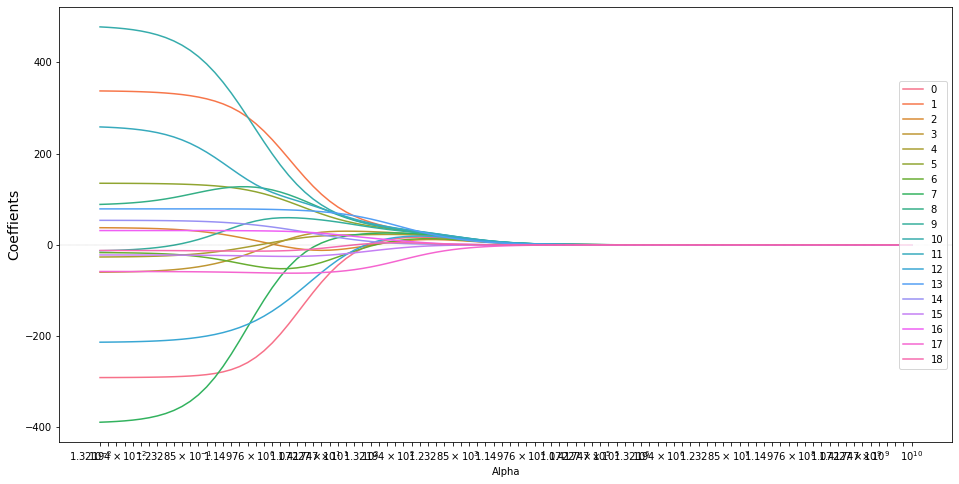

In [11]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [12]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[-289.51865327020033, 332.67911842339134, 34.779441936715294, -55.8447822963307, -24.166567449874105, 133.80205477153677, -19.909741728267363, -369.742687501733, 100.54237339890794, -3.614039922941853, 454.205685660006, 241.57214343742038, -209.5884504988249, 78.76557723286005, 53.01946396095706, -22.423285078781092, 31.278539444237804, -58.67555869272168, -12.63857792962912]


In [13]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[90]])

[5.763318248704298e-05, 6.40427770922997e-05, 5.007915350288836e-05, 6.129576852892078e-05, 6.561689194262846e-05, 6.480083916119167e-05, 5.849247359810473e-05, 7.681124525639192e-05, 8.013609785207737e-05, 7.663536669557499e-05, 8.214613025072635e-05, 8.277213810215086e-05, 7.150981326993898e-05, 4.386760495701926e-05, 3.713461226222579e-06, -7.8846092396675e-07, -2.08500226533533e-06, -2.810549748199536e-05, -4.13788785581499e-07]


#### we can see that for large values for lambda the ceoff are very very small, although none is equal to 0.

In [14]:
list_l2_norm = []
for alpha in list_alpha:
  list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))

(0.0, 100.0)

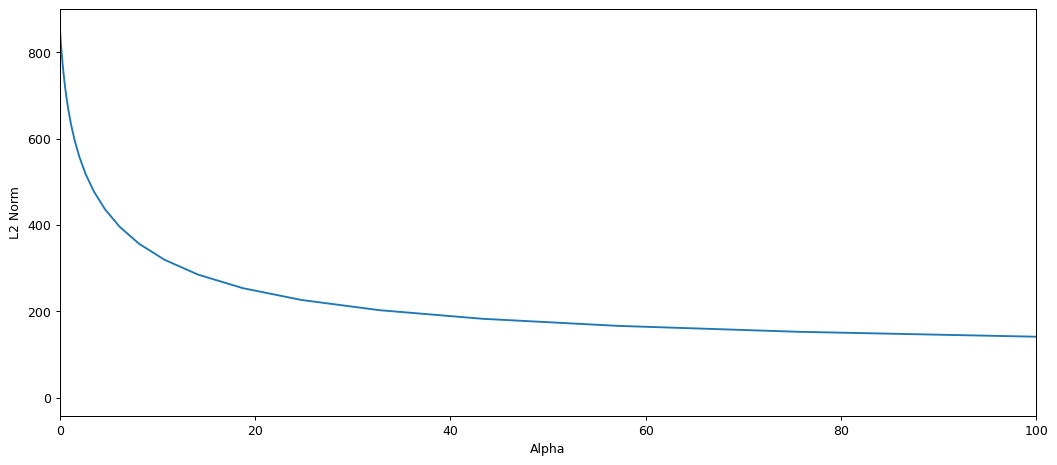

In [16]:
plt.figure(figsize = (14,6), dpi=90)
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,100)

#### this is the relationship between, l2 norm, and alpha, We can see that as X increases, l2 norm decreases. Which means 
#### the size of the coefficients are decreasing

### Selecting the best value of alpha

In [17]:
# Using validation approach
X_train,X_test,y_train,y_test = train_test_split(data.drop('Salary',axis = 1),data['Salary'],test_size = 0.3,random_state = 1)

In [18]:
validation_score = []
for alpha in list_alpha:
  model = Ridge(alpha=alpha)
  model.fit(X_train,y_train)
  validation_score.append(mean_squared_error(model.predict(X_test),y_test)*len(y_test))

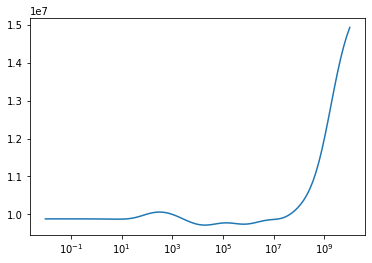

In [20]:
sns.lineplot(x=list_alpha, y=validation_score)
plt.xscale('log')

In [21]:
np.argmin(validation_score)

52

## Lasso

In [31]:
list_alpha = 10**np.linspace(-2,10,100)
list_alpha.dtype

dtype('float64')

In [32]:
# in R, by default, the predictors are standardized
X = data.drop('Salary',axis = 1)
y = data['Salary']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised

In [38]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

coeff_matrix = {}

for alpha in list_alpha:
  model = Lasso(alpha=alpha)
  model.fit(X,y)
  coeff_matrix[alpha] = list(model.coef_)

In [39]:
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0.010000,-286.905007,331.363096,36.212359,-57.357808,-25.658648,133.787447,-14.313048,-422.215279,133.673334,-4.578178,464.460502,246.073678,-208.802960,78.639945,54.350452,-22.467425,31.583507,-58.365877,-12.672573
0.013219,-286.950122,331.325695,36.091031,-57.257930,-25.528647,133.747959,-14.398744,-420.990800,132.935083,-4.435307,464.206011,245.764342,-208.778380,78.644615,54.304079,-22.452758,31.554027,-58.363511,-12.643337
0.017475,-287.009869,331.275922,35.930298,-57.125588,-25.356432,133.695761,-14.512163,-419.372611,131.963418,-4.244520,463.867405,245.352140,-208.745736,78.650806,54.242814,-22.433398,31.515092,-58.360387,-12.604741
0.023101,-287.089063,331.210178,35.717682,-56.950581,-25.128615,133.626802,-14.662262,-417.232465,130.679408,-3.991625,463.419197,244.805989,-208.702686,78.659004,54.161818,-22.407810,31.463628,-58.356260,-12.553732
0.030539,-287.193575,331.122512,35.436185,-56.718727,-24.827025,133.535567,-14.860641,-414.406159,128.989613,-3.654757,462.823461,244.079779,-208.645293,78.669850,54.054836,-22.374038,31.395662,-58.350806,-12.486383


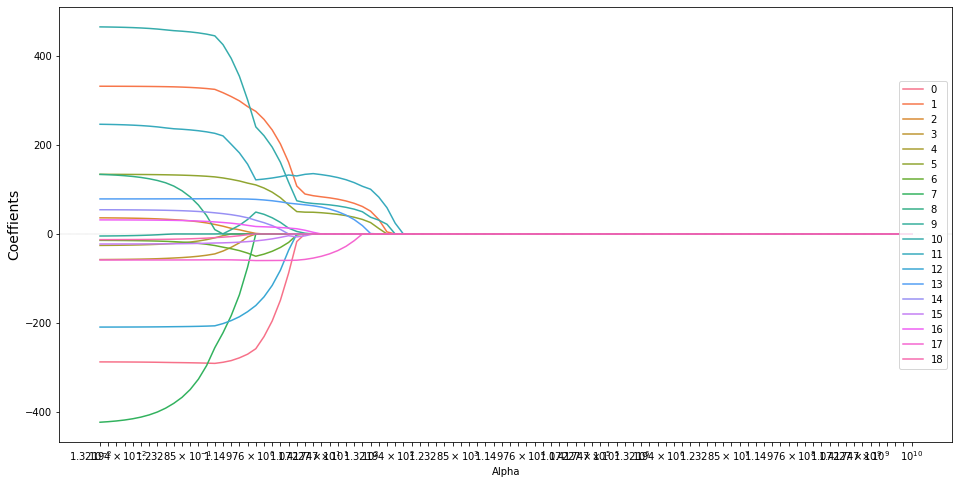

In [40]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [41]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[-288.06252906937317, 330.3698119988722, 33.06222643992311, -54.759037031179844, -22.284629558490984, 132.76311903093168, -16.525200498349694, -390.65923055726637, 114.82688141722784, -0.8084173075275888, 457.7814835607462, 237.95136546687874, -208.14987606522283, 78.76080852606087, 53.15428784246409, -22.0898409876407, 30.82323924266085, -58.30463802012481, -11.91895965736175]


In [42]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[90]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0]


#### we can see that for large values for lambda the ceoff are exactly zero, we can compare this with what we got from ridge.

In [44]:
list_l2_norm = []
for alpha in list_alpha:
  list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))

(0.0, 100.0)

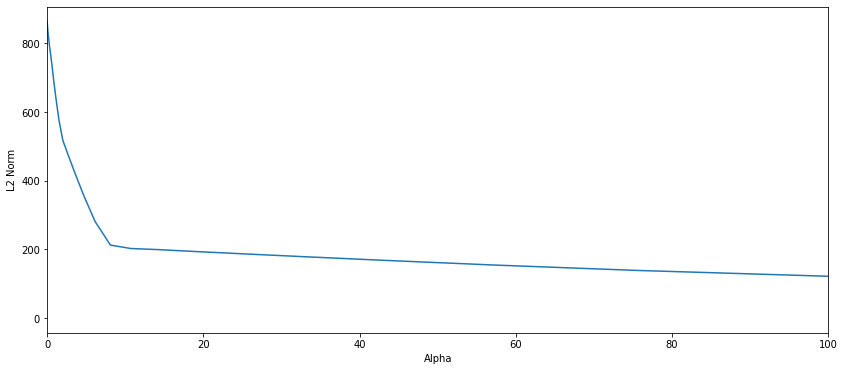

In [45]:
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,100)

#### this is the relationship between, l2 norm, and alpha, We can see that as X increases, l2 norm decreases. Which means 
#### the size of the coefficients are decreasing, but the decrease is not that smooth as it was in the case of Ridge regression

## Selecting the best value of alpha, this time using cross validation

In [47]:
parameters = {'alpha':list_alpha}
lasso = Lasso()
model = GridSearchCV(lasso,parameters)
model.fit(data.drop('Salary',axis = 1),data['Salary'])

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 1.32194115e-02, 1.74752840e-02, 2.31012970e-02,
       3.05385551e-02, 4.03701726e-02, 5.33669923e-02, 7.05480231e-02,
       9.32603347e-02, 1.23284674e-01, 1.62975083e-01, 2.15443469e-01,
       2.84803587e-01, 3.76493581e-01, 4.97702356e-01, 6.57933225e-01,
       8.69749003e-01, 1.14975700e+00, 1.51991108e+00, 2.00923...
       1.62975083e+07, 2.15443469e+07, 2.84803587e+07, 3.76493581e+07,
       4.97702356e+07, 6.57933225e+07, 8.69749003e+07, 1.14975700e+08,
       1.51991108e+08, 2.00923300e+08, 2.65608778e+08, 3.51119173e+08,
       4.64158883e+08, 6.13590727e+08, 8.11130831e+08, 1.07226722e+09,
       1.41747416e+09, 1.87381742e+09, 2.47707636e+09, 3.27454916e+09,
       4.32876128e+09, 5.72236766e+09, 7.56463328e+09, 1.00000000e+10])})

In [48]:
best_model = model.best_estimator_
best_model
# value of alpha is 174.75

Lasso(alpha=174.7528400007683)

In [49]:
# this is the model that is choosen
best_model.coef_

array([-1.39313334,  5.00607536,  0.        ,  0.        ,  0.        ,
        4.11310808, -0.        , -0.24893363,  0.43432675,  0.        ,
        1.19379874,  0.72902921, -0.49482578,  0.28710204,  0.24005195,
       -0.        ,  0.        , -0.        ,  0.        ])

#### We can see that only 10 coeffficients are having non zero weights. 

In [52]:
pd.DataFrame({'Coefficients':list(best_model.coef_)},index = list(data.drop('Salary',axis = 1).columns))

,Coefficients
AtBat,-1.393133
Hits,5.006075
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,4.113108
Years,-0.000000
CAtBat,-0.248934
CHits,0.434327
CHmRun,0.000000
